In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import gget

In [2]:
geneNamesPath = "/scratch/indikar_root/indikar1/shared_data/directRNA/references/geneNames.csv"

gf = pd.read_csv(geneNamesPath)
print(f"{gf.shape=}")
print(gf['geneId'].nunique())

gf = gf[['geneId', 'geneName']].drop_duplicates()
print(f"{gf.shape=}")

gf.head()

gf.shape=(262041, 5)
41407
gf.shape=(41407, 2)


,geneId,geneName
0,ENSG00000160072,ATAD3B
7,ENSG00000225972,MTND1P23
9,ENSG00000224315,RPL7P7
11,ENSG00000198744,MTCO3P12
13,ENSG00000279928,DDX11L17


In [55]:
dirPath = "/scratch/indikar_root/indikar1/shared_data/directRNA/counts/"

df = gf.copy()

fileNames = []

for f in os.listdir(dirPath):
    if "total" in f:
        fileId = f.split(".")[0]
        fullPath = f"{dirPath}{f}"
        tf = pd.read_csv(fullPath, header=None, sep="\t")
        tf.columns = ['geneId', fileId]
        fileNames.append(fileId)

        df = pd.merge(df, tf, 
                      how='left',
                      left_on='geneId',
                      right_on='geneId')
    
print(f"{df.shape=}")
df = df.fillna(0)
df.head()

df.shape=(41407, 100)


,geneId,geneName,total_FAS69398_pass_14a3cc95_9,total_FAS69398_pass_14a3cc95_54,total_FAS69398_pass_14a3cc95_53,total_FAS69398_pass_14a3cc95_93,total_FAS69398_pass_14a3cc95_20,total_FAS69398_pass_14a3cc95_34,total_FAS69398_pass_14a3cc95_57,total_FAS69398_pass_14a3cc95_73,...,total_FAS69398_pass_14a3cc95_17,total_FAS69398_pass_14a3cc95_33,total_FAS69398_pass_14a3cc95_64,total_FAS69398_pass_14a3cc95_40,total_FAS69398_pass_14a3cc95_0,total_FAS69398_pass_14a3cc95_60,total_FAS69398_pass_14a3cc95_41,total_FAS69398_pass_14a3cc95_91,total_FAS69398_pass_14a3cc95_82,total_FAS69398_pass_14a3cc95_36
0,ENSG00000160072,ATAD3B,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ENSG00000225972,MTND1P23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000224315,RPL7P7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ENSG00000198744,MTCO3P12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSG00000279928,DDX11L17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df['GeneCount'] = df[fileNames].sum(axis=1)

df['GeneCount'].max()

2170

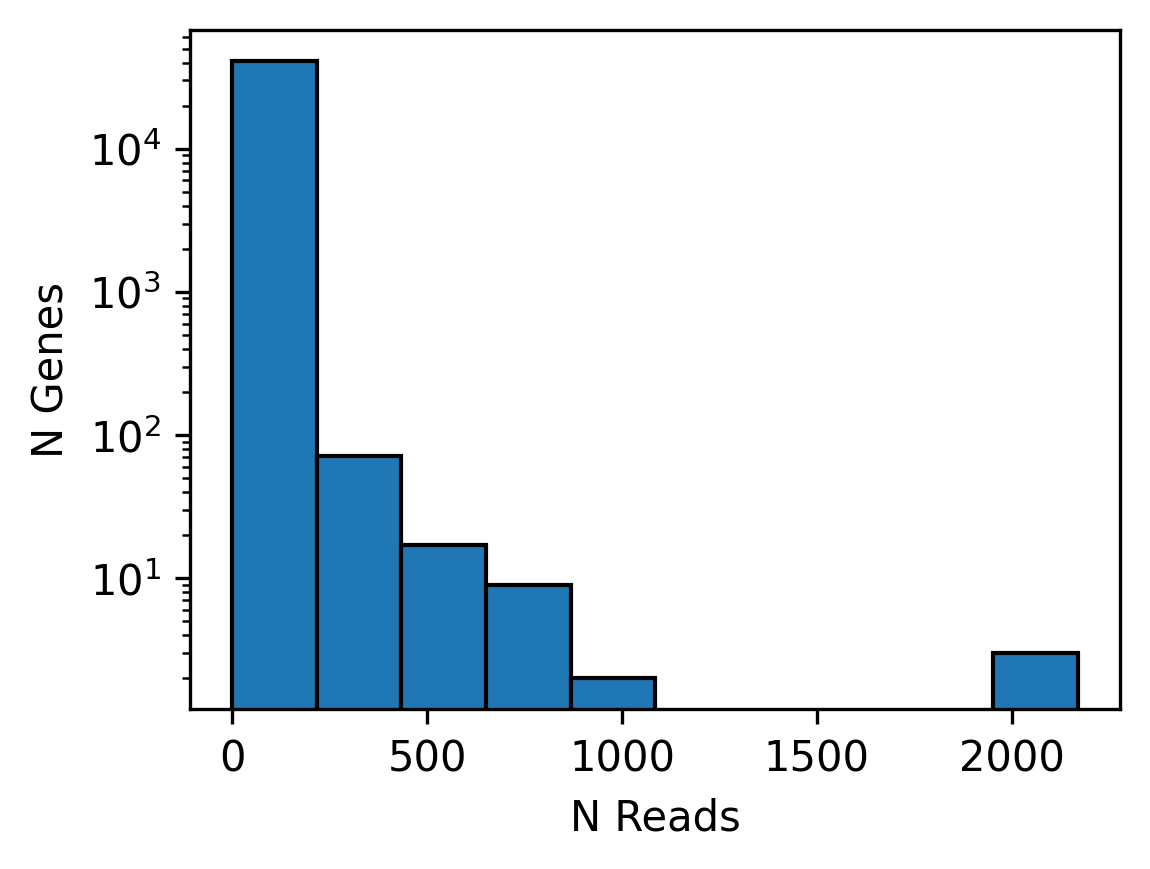

In [57]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.figsize'] = 4, 3

df['GeneCount'].hist(edgecolor='k')
plt.yscale("log")
plt.ylabel('N Genes')
plt.xlabel('N Reads')
plt.grid(False)

Text(0.5, 0, 'Read Count Threshold')

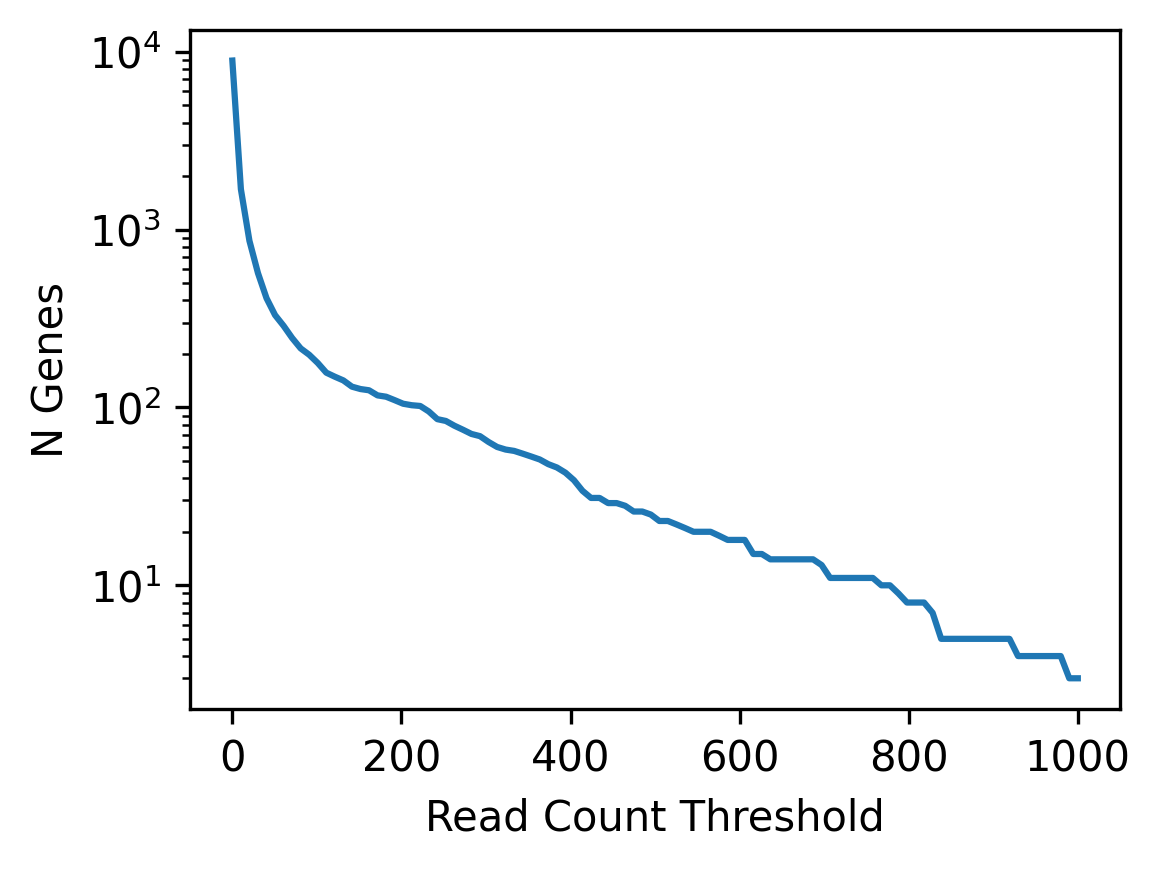

In [58]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.figsize'] = 4, 3

res = []
for t in np.linspace(0, 1000, 100):
    row = {
        'Threshold' : t,
        'N Genes' : df[df['GeneCount'] > t].shape[0]
    }
    res.append(row)
    
    
res = pd.DataFrame(res)


plt.plot(res['Threshold'], 
         res['N Genes'])

plt.yscale("log")
plt.ylabel('N Genes')
plt.xlabel('Read Count Threshold')
# detected = df[df['GeneCount'] > 0]
# detected.shape

In [53]:
# t = 0
# genes = df[df['GeneCount'] > t]['geneName'].to_list()
# genes

['HS6ST1P1',
 'IFT122',
 'NR2F1',
 'PRKN',
 'VCX3A',
 'LINC00552',
 'ZIC2',
 'NCBP3',
 'TIMP2',
 'RNF213',
 'SRC',
 'PLK5',
 'CAPNS1',
 'GYG2P1',
 'PANX2']

In [59]:
t = 5
genes = df[df['GeneCount'] > t]['geneName'].to_list()

db = 'PanglaoDB_Augmented_2021'
ef = gget.enrichr(genes, database=db)
pd.set_option('display.max_colwidth', 200)

ef[['path_name', 'p_val', 'overlapping_genes']].head(10)

Wed Dec 14 11:48:31 2022 INFO Performing Enichr analysis using database PanglaoDB_Augmented_2021.


,path_name,p_val,overlapping_genes
0,Pancreatic Stellate Cells,3.500655e-43,"[SPON2, SRPX, COL16A1, SPARC, HSPB6, COL12A1, MRGPRF, TNC, EFEMP2, GJA1, ISLR, ADAMTS2, C1QTNF1, TIMP3, EMILIN1, CCN2, TIMP1, PAMR1, PDGFRB, PDGFRA, POSTN, IGFBP5, DYNLT1, MMP2, BGN, PCOLCE, DCN, ..."
1,Fibroblasts,2.083083e-38,"[SPON2, SPARC, COL16A1, COL12A1, MRGPRF, FGF2, ISLR, EFEMP2, EFEMP1, CYP1B1, CCN2, PAMR1, PDGFRB, PDGFRA, POSTN, IL1R1, IGFBP3, DKK1, DKK3, RUNX1, CCDC80, COL4A2, LOX, COL4A1, COL8A1, S100A4, MYL9..."
2,Myofibroblasts,1.052239e-36,"[COL16A1, SPARC, HSPB6, ELN, COL12A1, MRGPRF, LDB2, MYLK, EFEMP2, GJA1, ISLR, TIMP3, PAMR1, TNS2, PDGFRB, PDGFRA, POSTN, IGFBP5, TPM2, MMP2, TPM1, BGN, DCN, DKK3, ACTA2, CCDC80, COL4A2, COL4A1, PA..."
3,Airway Smooth Muscle Cells,1.152592e-32,"[SRPX, HSPB6, TGFB1I1, COL12A1, MRGPRF, PLAT, LOXL1, LOXL2, MRC2, SYDE1, EFEMP2, ADAMTS2, ADGRA2, ADAMTS1, TIMP3, EMILIN1, PDGFRB, PDGFRA, POSTN, IGFBP5, TPM2, MMP2, TPM1, BGN, PCOLCE, DCN, DKK3, ..."
4,Pulmonary Vascular Smooth Muscle Cells,1.152592e-32,"[SPARC, HSPB6, CNRIP1, ELN, MRGPRF, LDB2, MYLK, EFEMP2, ISLR, ADAMTS2, ADGRA2, EMILIN1, PAMR1, PDGFRB, ZCCHC24, PDGFRA, POSTN, MMP2, BGN, PCOLCE, DCN, ACTA2, CCDC80, COL4A1, COL6A2, CDH11, SERPING..."
5,Hepatic Stellate Cells,1.205647e-32,"[SRPX, COL16A1, SPARC, HSPB6, COL12A1, MRGPRF, LDB2, ANTXR1, EFEMP2, GJA1, ISLR, ADAMTS2, C1QTNF1, TIMP3, EMILIN1, CCN2, TIMP1, CCN1, PAMR1, TNS2, PDGFRB, PDGFRA, POSTN, IGFBP5, IGFBP3, TPM2, MMP2..."
6,Mesangial Cells,2.948099e-32,"[ECM1, COL16A1, SPARC, SERPINE2, COL12A1, MRGPRF, LDB2, MYLK, AKAP12, EFEMP2, GJA1, ISLR, EFEMP1, PLAU, TIMP3, EMILIN1, CCN2, PAMR1, TNS2, PDGFRB, PDGFRA, POSTN, IGFBP5, ACTN1, TPM2, MMP2, TPM1, B..."
7,Peritubular Myoid Cells,5.726973e-30,"[COL16A1, HSPB6, ELN, COL12A1, MRGPRF, SAT2, MYLK, ISLR, EFEMP1, C1QTNF1, CYP1B1, TIMP3, PAMR1, TNS2, SH3D19, PDGFRB, OSR2, PDGFRA, POSTN, IGFBP5, TPM4, TPM2, MMP2, TPM1, BGN, DCN, ACTA2, COL4A2, ..."
8,Osteoblasts,7.080271e-29,"[COL16A1, SPARC, COL12A1, MRGPRF, TNC, MRC2, EFEMP2, GJA1, ISLR, ADAMTS2, EFEMP1, C1QTNF1, BDKRB2, TIMP3, PAMR1, EPHB4, TNS2, PDGFRB, PDGFRA, POSTN, IGFBP5, IGFBP3, MMP2, F2R, WNT5A, BGN, EMP1, DC..."
9,Stromal Cells,1.068029e-28,"[COL16A1, SPARC, ELN, MRGPRF, TNC, LDB2, EFEMP2, ISLR, ADAMTS2, ADGRA2, TIMP3, EMILIN1, ITGAV, PAMR1, PDGFRB, PDGFRA, POSTN, MME, MMP1, MMP2, BGN, DCN, DKK3, ACTA2, MMP14, CCDC80, COL4A2, COL4A1, ..."


In [60]:
alpha = 0.05
ef  = ef[ef['p_val'] <= alpha]
ef.to_csv("CellTypePredictions.csv", index=False)
